In [96]:
import os
import matplotlib.pyplot as plt
import numpy as np
from minisom import MiniSom
from tqdm.auto import tqdm
from skimage.color import rgb2hsv

In [10]:
file_name = os.path.join(os.environ['ONEDRIVE'], r'Pictures\DesktopPictures', 'macOS-Sierra-Wallpaper-Macbook-Wallpaper.jpg')

In [38]:
mat = plt.imread(file_name)
mat = mat[::10, ::10]
mat.shape

(180, 288, 3)

In [39]:
X = mat.reshape((-1, 3)).astype(np.float32)
X /= 255
X.shape

(51840, 3)

In [88]:
# compute som size by counting samples
n = np.ceil(np.sqrt(5 * np.sqrt(X.shape[0]))).astype(int)
# n = 50
print(n)

# Initialize som using counting of features
som = MiniSom(n, n, 3, sigma=n/2, learning_rate=0.2)

# trains the SOM with 10000 iterations
som.train(X, 10000, verbose=False)

print(f'SOM ({n}, {n}, {X.shape[1]}) is trained.')

34
SOM (34, 34, 3) is trained.


In [89]:
Xq = np.array([som.quantization([e]) for e in tqdm(X)]).squeeze()
Xq.shape

  0%|          | 0/51840 [00:00<?, ?it/s]

(51840, 3)

In [90]:
matq = Xq.reshape(mat.shape)
matq.shape

(180, 288, 3)

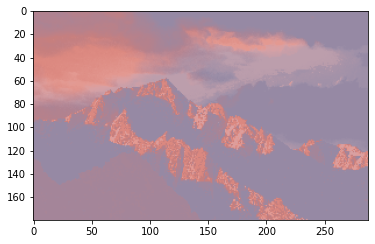

In [91]:
plt.imshow(matq)

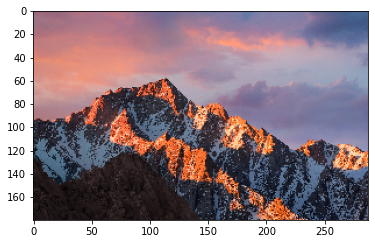

In [92]:
plt.imshow(mat)

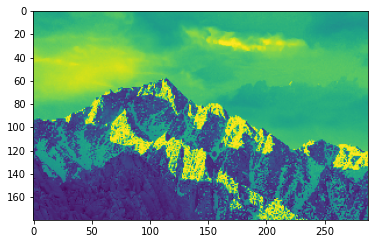

In [100]:
plt.imshow(rgb2hsv(mat)[:, :, 2])

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
mms = MinMaxScaler()

In [106]:
mms.fit(X)

MinMaxScaler()

In [107]:
mms.transform(Xq)

array([[0.70099051, 0.53989498, 0.702938  ],
       [0.69451646, 0.54146936, 0.70979541],
       [0.69451646, 0.54146936, 0.70979541],
       ...,
       [0.5897989 , 0.57185991, 0.81134467],
       [0.5897989 , 0.57185991, 0.81134467],
       [0.5897989 , 0.57185991, 0.81134467]])